# Examples of plots

This notebook presents examples of the `bff.plot` module.

For each function, the `ax` can be provided and is returned by the function.<br />
This allow to plot multiple things on the same axis and modify it if needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bff.plot as bplt

np.random.seed(42)

In [2]:
# Variables with fake data to display.
history = {
    'loss': [2.3517270615352457, 2.3737808328178063, 2.342552079627262,
             2.310529179309481, 2.3773420348239305, 2.3290258640020935,
             2.3345777257603015, 2.336566770496081, 2.34276949460782,
             2.321525989465378, 2.3300879552735756, 2.3224288386915197,
             2.324129374183003, 2.3158747431021838, 2.3194296072475873,
             2.2962934024369894, 2.296843618603807, 2.298411148876401,
             2.302087271033819, 2.2869889256942213],
    'acc': [0.085427135, 0.09045226, 0.110552765, 0.110552765, 0.06030151,
            0.14070351, 0.110552765, 0.10552764, 0.09045226, 0.10050251,
            0.11557789, 0.12060302, 0.110552765, 0.10552764, 0.1356784,
            0.15075377, 0.11557789, 0.12060302, 0.10552764, 0.14572865],
    'val_loss': [2.3074077556791077, 2.306745302662272, 2.3061152659403104,
                 2.3056061252970226, 2.30513324273213, 2.3046621198808954,
                 2.304321059871107, 2.304280655512054, 2.3042611346560324,
                 2.3042683235268466, 2.3044002410326705, 2.304716517416279,
                 2.3049982415602894, 2.305085456921962, 2.3051163034046187,
                 2.3052417696192022, 2.3052861982219377, 2.305426104982545,
                 2.305481707112173, 2.3055578968795793],
    'val_acc': [0.11610487, 0.11111111, 0.11485643, 0.11360799, 0.11360799,
                0.11985019, 0.11111111, 0.10861423, 0.10861423, 0.10486891,
                0.10362048, 0.096129835, 0.09238452, 0.09113608, 0.09113608,
                0.08739076, 0.08988764, 0.09113608, 0.096129835, 0.09363296]
}

y_true = [1.87032178, 1.2272566 , 9.38496685, 7.91451104, 7.60794146,
          9.65912261, 2.5405396 , 7.31815866, 5.91692937, 2.78676838,
          7.9258648 , 2.31337877, 1.78432016, 9.5559698 , 6.64471696,
          3.33907423, 7.49321025, 7.14822795, 4.11686499, 2.40202043]

y_pred = [1.85161709, 1.33317135, 9.45246137, 7.9198675 , 7.54877922,
          9.7153202 , 3.56777447, 7.88673475, 5.56090322, 2.78851836,
          6.70636033, 2.67531555, 1.13061356, 8.29287223, 6.27275223,
          2.4957286 , 7.14305019, 8.53578604, 3.99890533, 2.35510298]

## Plot of history

The `plot_history` function can plot the loss and a metric from the `history.history` dictionary usually returned by a Keras model.

Plot of only loss with grid and a different style for matplotlib. 

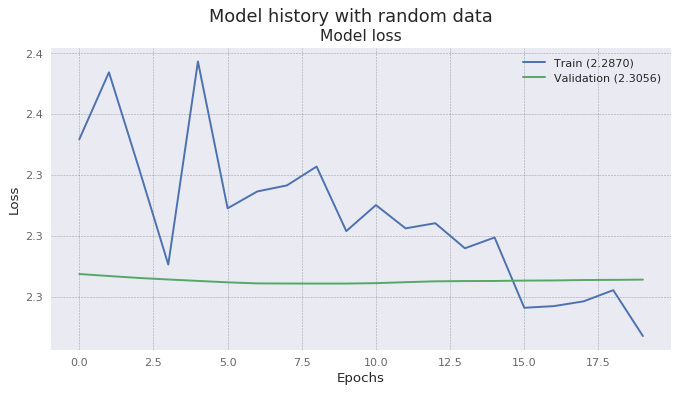

In [36]:
bplt.plot_history(history, title='Model history with random data', grid='both', figsize=(10, 5), style='seaborn')

Plot of history using a previously created axis.

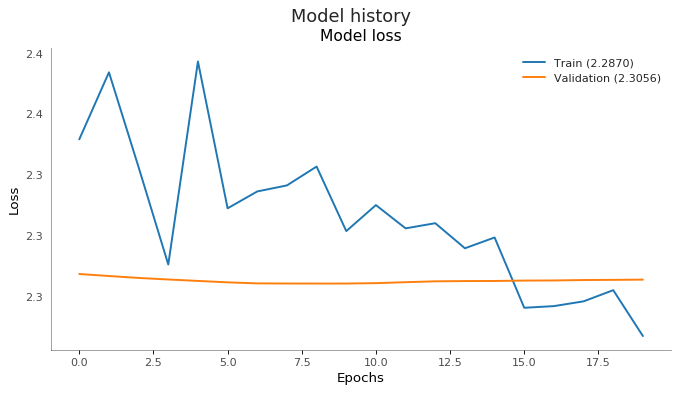

In [37]:
__, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=80)
bplt.plot_history(history, axes=ax, style='seaborn')

Plot of history with loss and acc.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fd8b12ac8>,
      dtype=object)

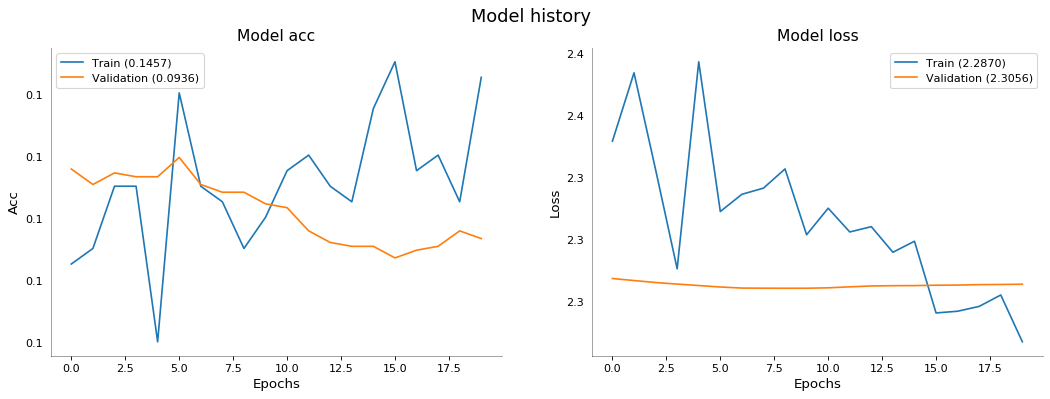

In [4]:
bplt.plot_history(history, metric='acc')

## Plot of predictions

Plot of actual and predicted values on the same axis.

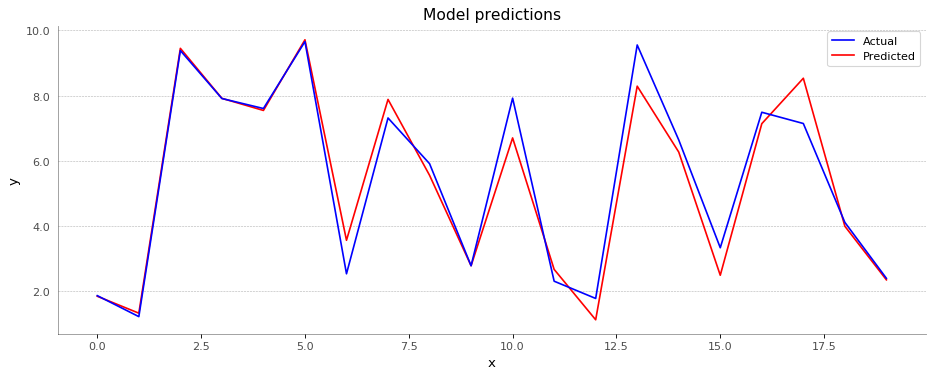

In [5]:
bplt.plot_predictions(y_true, y_pred)

## Plot series

Series can either be plot on the same axis or in different ones in the same figure.

Some fake data are created in a `DataFrame`. The index must be named `datetime`. A different color is assigned to each of the acceleration.

In [3]:
AXIS = {'x': 'darkorange', 'y': 'green', 'z': 'steelblue'}
data = (pd.DataFrame(np.random.randint(0, 100, size=(60 * 60, 3)), columns=AXIS.keys())
        .set_index(pd.date_range('2018-01-01', periods=60 * 60, freq='S'))
        .rename_axis('datetime'))

data_miss = (data
             .drop(pd.date_range('2018-01-01 00:05', '2018-01-01 00:07', freq='S'))
             .drop(pd.date_range('2018-01-01 00:40', '2018-01-01 00:41', freq='S'))
             .drop(pd.date_range('2018-01-01 00:57', '2018-01-01 00:59', freq='S'))
             )

Plot of x, y and z acceleration on the same axis. The function is returning the axis so it can be used in the next plot.

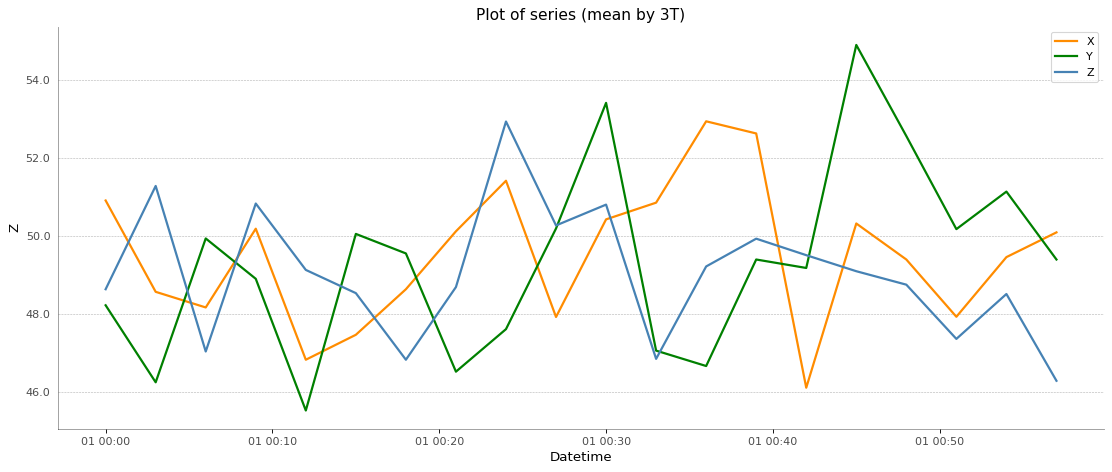

In [4]:
ax = bplt.plot_series(data, 'x', groupby='3T', title=f'Plot of all axis', color=AXIS['x'])
for k in list(AXIS.keys())[1:]:
    bplt.plot_series(data, k, groupby='3T', ax=ax, color=AXIS[k])

This time, accelerations are plot on a figure containing a different axis for each acceleration.

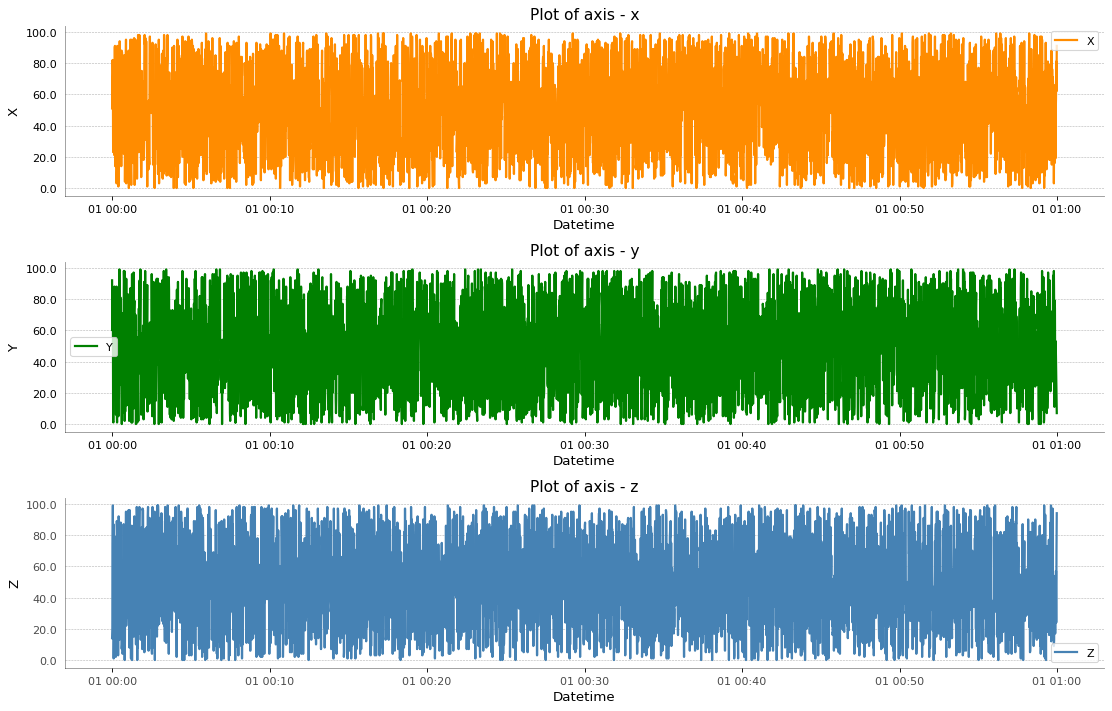

In [5]:
_, axes = plt.subplots(nrows=len(AXIS), ncols=1, figsize=(14, len(AXIS) * 3), dpi=80)
for i, k in enumerate(AXIS.keys()):
    bplt.plot_series(data, k, ax=axes[i], title=f'Plot of axis - {k}', color=AXIS[k])

A resampling of the data is done by averaging each 2 minutes (`2T`). A peak detection is done as well.

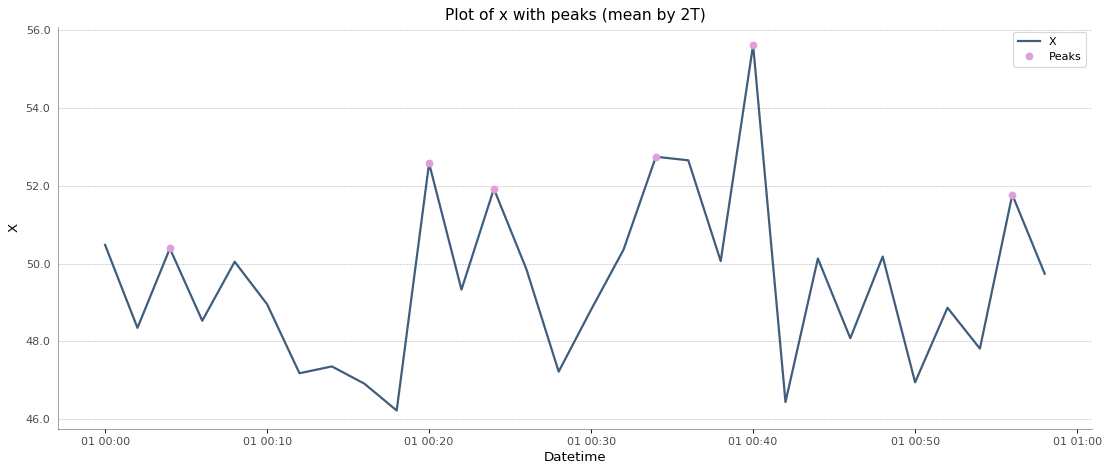

In [16]:
bplt.plot_series(data, 'x', groupby='2T', with_peaks=True, title=f'Plot of x with peaks')

A resampling of the data is done by averaging each 3 minutes (`2T`). The standard error of the mean (SEM) is plotted as well. This is usefull to see if the data are close to the mean or not since there was a resampling.

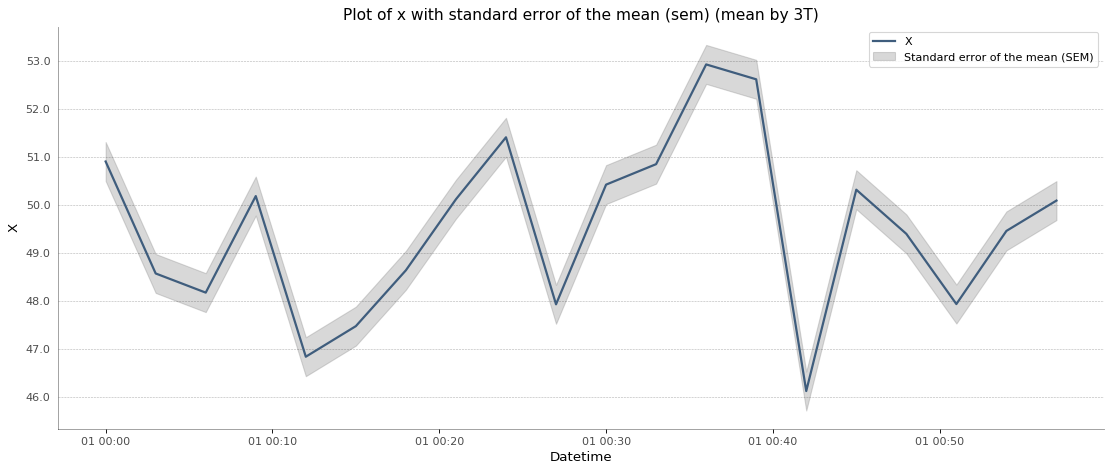

In [26]:
bplt.plot_series(data, 'x', groupby='3T', with_sem=True, title=f'Plot of x with standard error of the mean (sem)')

Plot of a serie with missing data. By specifying the resampling, we can easily see if some of the datetime are missing.

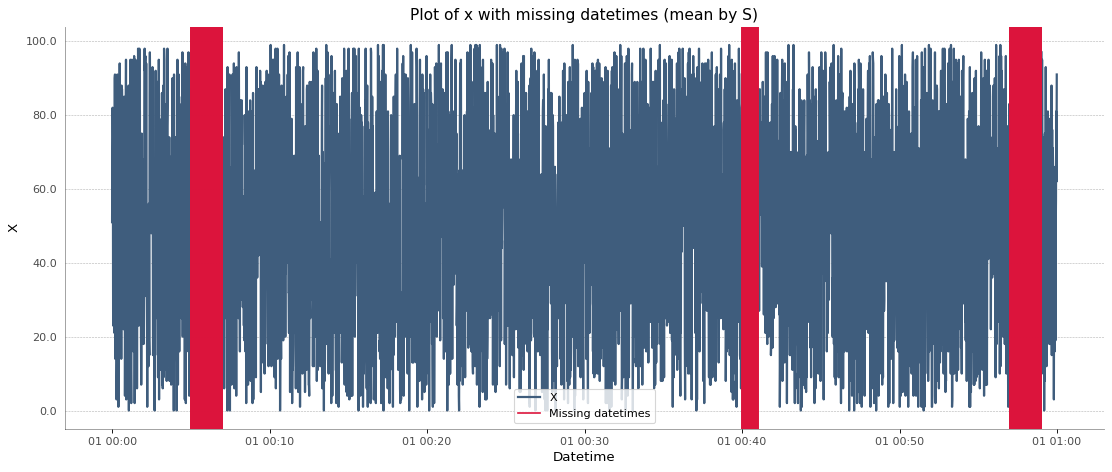

In [20]:
bplt.plot_series(data_miss, 'x', groupby='S', with_missing_datetimes=True,
                 title=f'Plot of x with missing datetimes')

Same as the previous plot, but with a group by minute (`T`). Since this is regroup by minute, there are less data missing. 

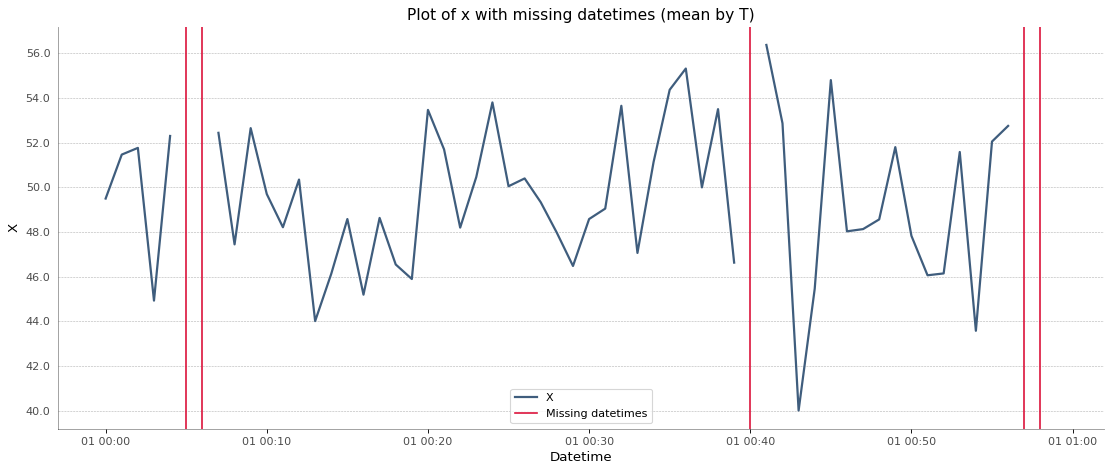

In [21]:
bplt.plot_series(data_miss, 'x', groupby='T', with_missing_datetimes=True,
                 title=f'Plot of x with missing datetimes')

## Plot true vs pred

Plot the real data against the predictions. The correlation (`R`) can be calculated or not using the `with_correlation` option.

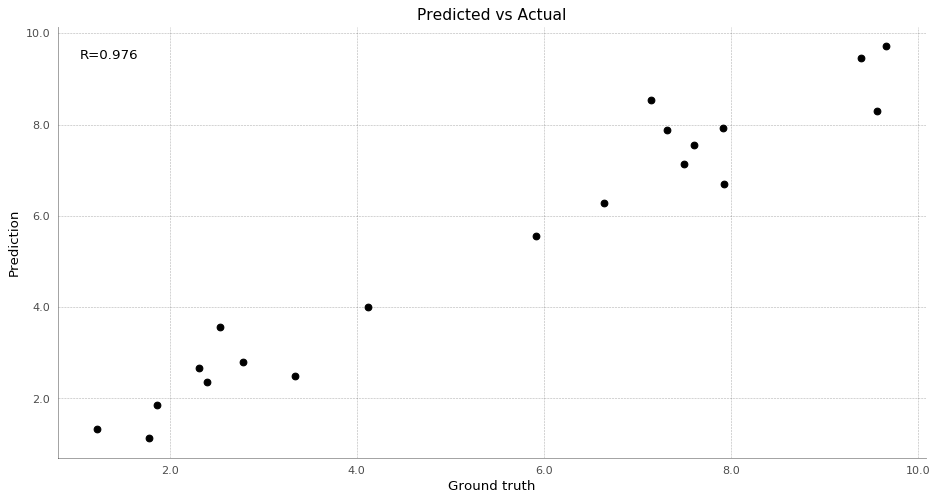

In [6]:
bplt.plot_true_vs_pred(y_true, y_pred)

Using the `with_histograms` option, the function will plot histograms on the side, showing the distribution of the data.

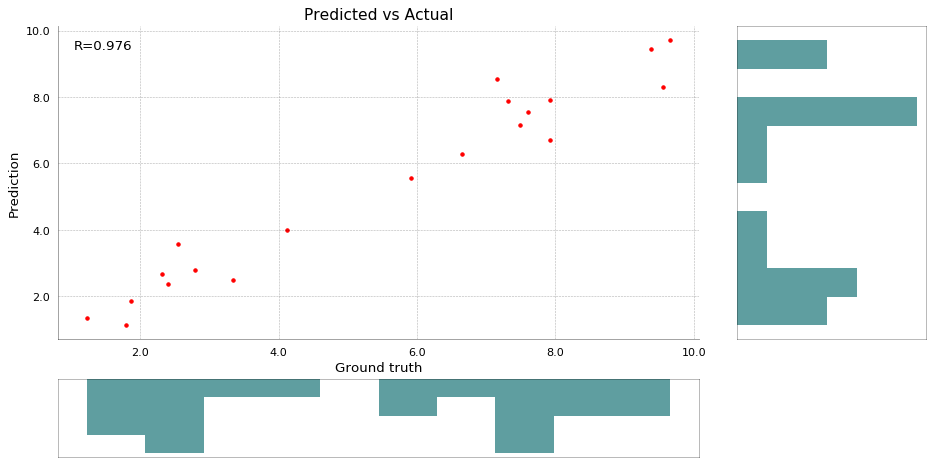

In [7]:
ax = bplt.plot_true_vs_pred(y_true, y_pred, with_histograms=True, marker='.', c='r')

Plot using a previously created axis.

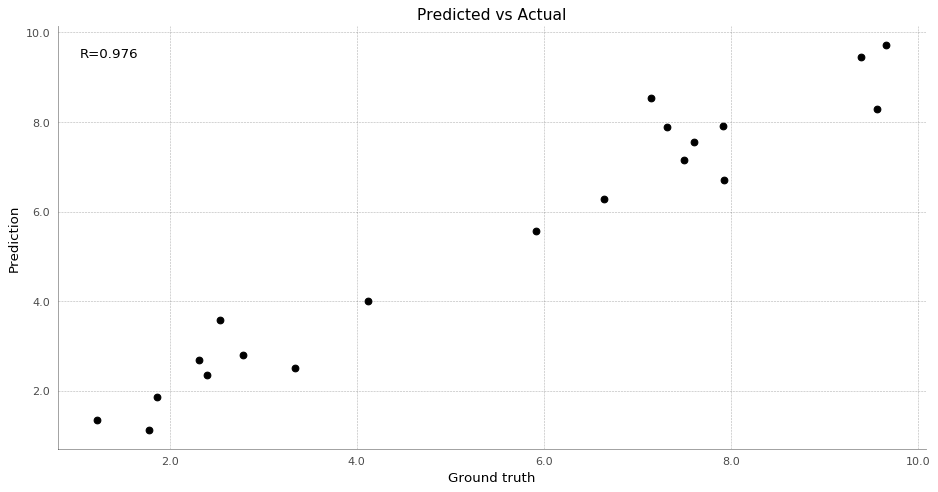

In [28]:
__, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=80)
bplt.plot_true_vs_pred(y_true, y_pred, ax=ax)